In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
diabetes_data = load_diabetes()

df = pd.DataFrame(diabetes_data.data, columns = diabetes_data.feature_names)
df['Target'] = diabetes_data.target

In [4]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
X = df.drop(columns = 'Target')
y = df['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [7]:
### Linear Regression Training
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
### Linear Regression Evaluation
print(f'R Squared for Training Data: {lr.score(X_train, y_train)}')
print(f'R Squared for Test Data: {lr.score(X_test, y_test)}')

print(f'Mean Squared Error for Test Data: {mean_squared_error(y_test, lr.predict(X_test))}')

R Squared for Training Data: 0.5279198995709652
R Squared for Test Data: 0.45260660216173787
Mean Squared Error for Test Data: 2900.1732878832318


In [9]:
lr.coef_

array([  37.90031426, -241.96624835,  542.42575342,  347.70830529,
       -931.46126093,  518.04405547,  163.40353476,  275.31003837,
        736.18909839,   48.67112488])

In [10]:
### Determining Optimal Alpha Value for Ridge Regression
alpha_num = [0.0001, 0.001,0.01, 0.1, 1, 10]

ridge_reg_cv = RidgeCV(alphas = alpha_num)  
ridge_reg_cv.fit(X_train, y_train)
ridge_reg_cv.alpha_

0.001

In [11]:
### Ridge Regression Training
rr = Ridge(alpha=0.001)
rr.fit(X_train, y_train)

Ridge(alpha=0.001)

In [12]:
### Ridge Regression Evaluation
print(f'R Squared for Training Data: {rr.score(X_train, y_train)}')
print(f'R Squared for Test Data: {rr.score(X_test, y_test)}')

print(f'Mean Squared Error for Test Data: {mean_squared_error(y_test, rr.predict(X_test))}')

R Squared for Training Data: 0.5278462338370482
R Squared for Test Data: 0.4534315003732735
Mean Squared Error for Test Data: 2895.8028519814366


In [13]:
rr.coef_

array([  38.47997852, -241.35368545,  543.83212619,  346.78758364,
       -827.67603502,  437.15629677,  116.93428866,  260.75217177,
        696.11975881,   49.74390376])

In [14]:
### Determining Optimal Alpha Value for Lasso Regression
alpha_num = [0.0001, 0.001,0.01, 0.1, 1, 10]

lasso_reg_cv = LassoCV(alphas = alpha_num)  
lasso_reg_cv.fit(X_train, y_train)
lasso_reg_cv.alpha_

0.1

In [15]:
### Lasso Regression Training
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [16]:
### Lasso Regresssion Evaluation
print(f'R Squared for Training Data: {lasso.score(X_train, y_train)}')
print(f'R Squared for Test Data: {lasso.score(X_test, y_test)}')

print(f'Mean Squared Error for Test Data: {mean_squared_error(y_test, lasso.predict(X_test))}')

R Squared for Training Data: 0.5169420144043178
R Squared for Test Data: 0.47185526169086933
Mean Squared Error for Test Data: 2798.1909687423636


In [17]:
lasso.coef_

array([   0.        , -152.66706552,  552.6941724 ,  303.37055083,
        -81.3648345 ,   -0.        , -229.25829816,    0.        ,
        447.91818931,   29.64235375])

In [18]:
df.columns.drop('Target')

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

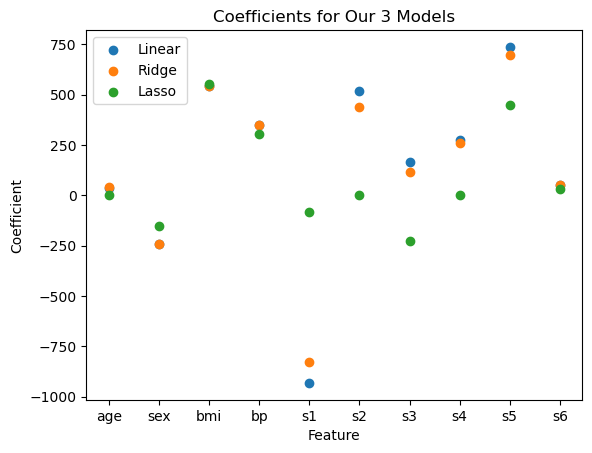

In [19]:
plt.scatter(df.columns.drop('Target'), lr.coef_, label = 'Linear')
plt.scatter(df.columns.drop('Target'), rr.coef_, label = 'Ridge')
plt.scatter(df.columns.drop('Target'), lasso.coef_, label = 'Lasso')
plt.legend(loc = 'upper left')
plt.title('Coefficients for Our 3 Models')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [47]:
### Beware of the alpha
lasso2 = Lasso(1.5)
lasso2.fit(X_train, y_train)

Lasso(alpha=1.5)

In [48]:
### Lasso2 Regresssion Evaluation
print(f'R Squared for Training Data: {lasso2.score(X_train, y_train)}')
print(f'R Squared for Test Data: {lasso2.score(X_test, y_test)}')

print(f'Mean Squared Error for Test Data: {mean_squared_error(y_test, lasso2.predict(X_test))}')

R Squared for Training Data: 0.23464399646152456
R Squared for Test Data: 0.22413000301745278
Mean Squared Error for Test Data: 4110.676981134653


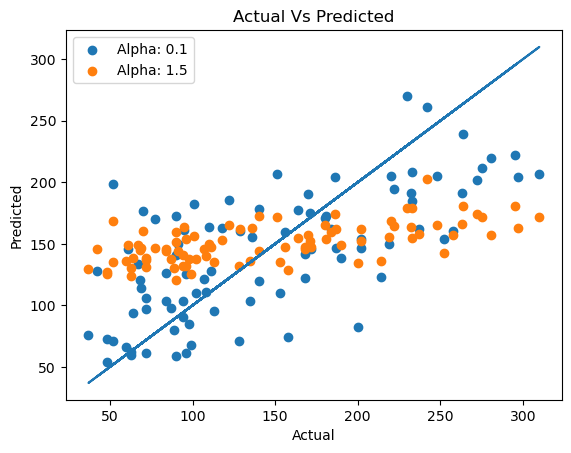

In [51]:
plt.scatter(y_test, lasso.predict(X_test), label = 'Alpha: 0.1')
plt.scatter(y_test, lasso2.predict(X_test), label = 'Alpha: 1.5')
plt.plot(y_test, y_test)
plt.legend(loc = 'upper left')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')
plt.show()